___
# Exercício: TLC, Erro Amostral, Margem de erro e Tamanho Amostral
___
## Aula 19

<div id="indice"></div>

## Índice

- [Tomando decisões com TLC - Resistores](#tomando-decisoes)
- [Tempo de espera na fila do *check-in*](#tempoespera)
___

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from math import sqrt

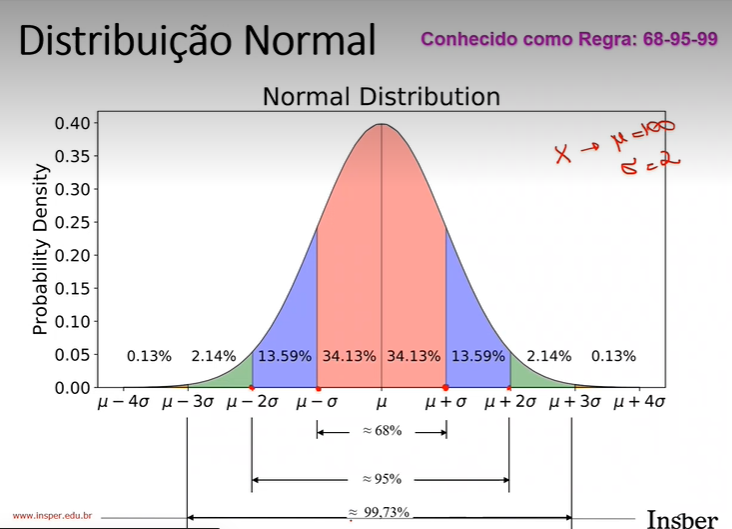

<div id="tomando-decisoes"></div>

## Tomando decisões com uso do TLC

Vamos considerar agora um exemplo (baseado no Exemplo 7-1 Montgomery). 

Um fabricante de componentes eletrônicos afirma que os resistores produzidos por ele possuem uma resistência média de $100 \Omega$ e um desvio padrão de $2 \Omega$. A distribuição da resistência de cada resistor é normal.

Antes de fechar uma grande compra com esse fabricante, considerando seus conhecimentos adquiridos ao longo da graduação no Insper, você decidiu solicitar uma pequena amostra de 25 resistores para realizar um teste de qualidade. O objetivo desta parte da atividade é decidir se você confia ou não na palavra do fabricante.

Considere aqui o valor de $\sigma=2$ teórica não esteja sendo questionado sobre a qualidade do fabricante.

Responda: (<a href="#respostas1">Respostas</a>)

a) Seja $\overline{X}$ a resistência média de uma amostra com 25 resistores selecionados aleatoriamente. De acordo com o TLC, qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)?

In [3]:
# X: resistência de cada resistor no lote
# X ~ Normal
# E(X) = mu 
# var(X) = sigma² = 2² = 4

# Distribuição de X_barra quando n = 25

# X_barra ~ Normal de forma exata

# E(X_barra) = mu é desconhecido -> A verdadeira resistência média do lote
# Var(X_barra) = Var(X)/n = sigma**2/n = 4/25 ---> dp(X_barra) = 2/5

# X_barra ~ N(mi,4/25)

# sob a hipotese do lote estar ok, temos -> esta de acordo com as especificaçõe então mu = 100
# X_barra ~ N(100,4/25)

In [4]:
n = 25
mu = 100 # sob a hipótese de que o lote está ok
sigma = 2

mu_Xbarra = 100
sigma_Xbarra = sqrt(4/25)

b) Construa um gráfico para visualizar a distribuição $X$ e de $\overline{X}$.

In [13]:
# Distribuição de x

x = np.linspace(90,110,1000)
fx = stats.norm.pdf(x, loc = mu, scale = sigma)

# Distribuição de x
x2 = np.linspace(98,102,1000)
fx2 = stats.norm.pdf( x2, loc = mu_Xbarra, scale = sigma_Xbarra)


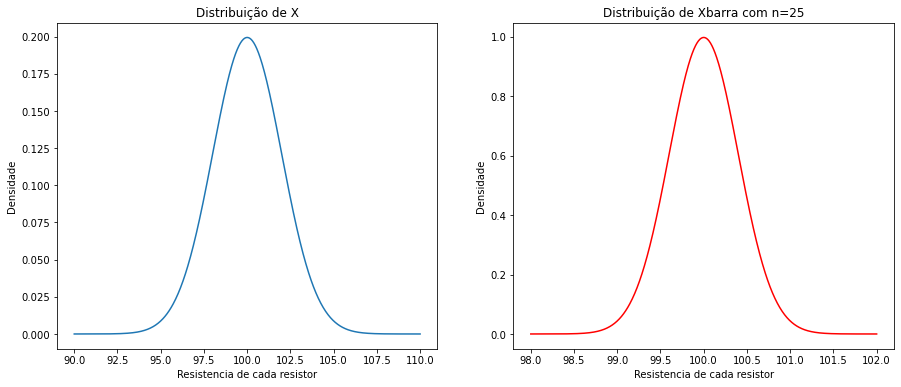

In [17]:

plt.figure(figsize= (15,6))
plt.subplot(121)
plt.plot(x,fx)
plt.ylabel('Densidade')
plt.xlabel('Resistencia de cada resistor')
plt.title('Distribuição de X')
# plt.ylim(0,1)

plt.subplot(122)
plt.plot(x2,fx2, color = 'red')
plt.ylabel('Densidade')
plt.xlabel('Resistencia de cada resistor')
plt.title('Distribuição de Xbarra com n=25')

plt.show()

c) Assuma que o fabricante esteja produzindo resistores com $\mu=100 \Omega$. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=25$, que contemplam $90\%$ das possíveis médias amostrais mais próximas de $\mu$.
Neste item, consulte o comando `stats.norm.interval()` explicado [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [21]:
# ESCREVA SEU CÓDIGO AQUI

# Chamem esses limites de:
# x_barra_menor
# x_barra_maior

x_barra_menor = stats.norm.ppf(0.05, loc = mu_Xbarra, scale = sigma_Xbarra)
x_barra_maior = stats.norm.ppf(1 - 0.05, loc = mu_Xbarra, scale = sigma_Xbarra)

print(x_barra_menor)
print(x_barra_maior)

99.34205854921942
100.65794145078058


In [23]:
x_barra_menor, x_barra_maior = stats.norm.interval(0.9, loc = mu_Xbarra, scale = sigma_Xbarra)

print(x_barra_menor)
print(x_barra_maior)

99.34205854921942
100.65794145078058


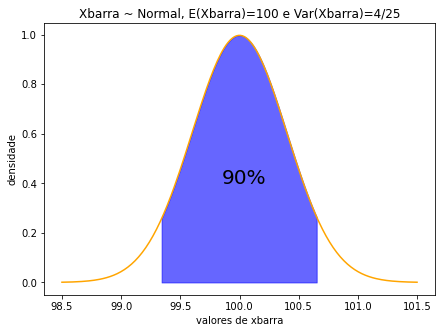

In [19]:
plt.figure(figsize=(7, 5))

# Para Xbarra
x_ = np.linspace(98.5, 101.5, 200)
fx_ = stats.norm.pdf(x_, loc=mu,  scale=sigma/sqrt(n))

plt.plot(x_, fx_, color='orange')
plt.ylabel('densidade')
plt.xlabel('valores de xbarra')
plt.title('Xbarra ~ Normal, E(Xbarra)=100 e Var(Xbarra)=4/25')


x_intervalo = np.arange(x_barra_menor,x_barra_maior,0.01)
fx_intervalo = stats.norm.pdf(x_intervalo,  loc=mu,  scale=sigma/sqrt(n))
plt.fill_between(x_intervalo, fx_intervalo, alpha=0.6, color='b')

plt.text(99.85, 0.4, "90%", fontsize=20)
plt.show()

d) Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=100 \Omega$, $n=25$ e coeficiente de confiança igual a $90\%$.

In [24]:
x_barra_maior = stats.norm.ppf(1 - 0.05, loc = mu_Xbarra, scale = sigma_Xbarra)
mu = stats.norm.ppf(0.5, loc = mu_Xbarra, scale = sigma_Xbarra)

margem_de_erro = x_barra_maior - mu
margem_de_erro

0.6579414507805836

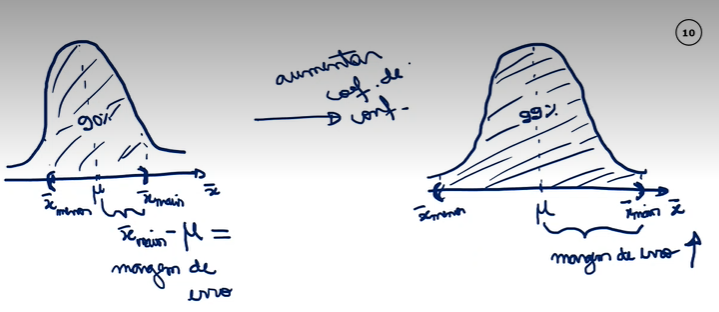

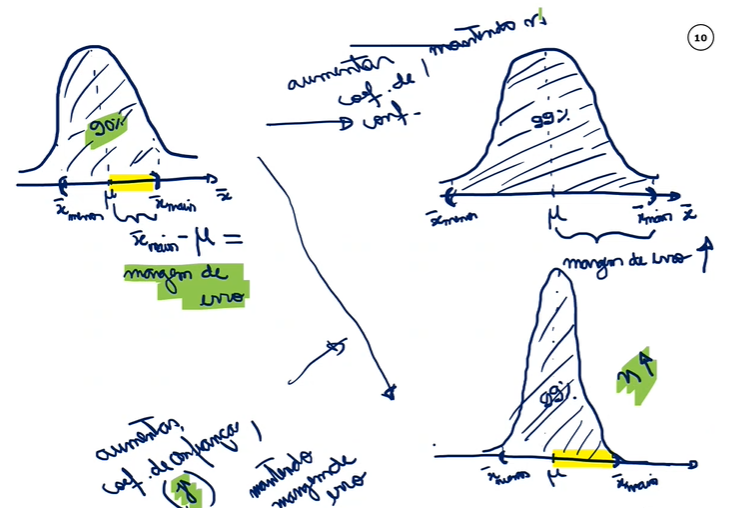

e) Se uma amostra de 25 resistores é coletada e a média amostral calculada é igual a $\overline{x}=98.929451$. Com $90\%$ de confianca, você acredita que essa amostra foi coletada de um população cuja verdadeira média é $\mu=100\Omega$? Ou seja, voce confia no fabricante?

In [27]:
# A estimativa está fora da zona de confiabilidade, 

# A única estimativa (x_barra) ela não pertence a esse intervalo dos valores mais prováveis sob essa hipótese
# O fabricante não fala a verdade

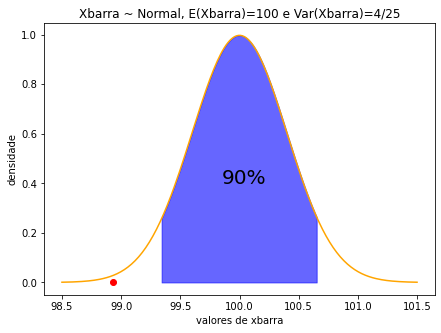

In [26]:
plt.figure(figsize=(7, 5))

# Para Xbarra
x_ = np.linspace(98.5, 101.5, 200)
fx_ = stats.norm.pdf(x_, loc=mu,  scale=sigma/sqrt(n))

plt.plot(x_, fx_, color='orange')
plt.ylabel('densidade')
plt.xlabel('valores de xbarra')
plt.title('Xbarra ~ Normal, E(Xbarra)=100 e Var(Xbarra)=4/25')

x_intervalo = np.arange(x_barra_menor,x_barra_maior,0.01)
fx_intervalo = stats.norm.pdf(x_intervalo,  loc=mu,  scale=sigma/sqrt(n))
plt.fill_between(x_intervalo, fx_intervalo, alpha=0.6, color='b')

plt.text(99.85, 0.4, "90%", fontsize=20)

plt.scatter(98.929451, 0 , color='red')

plt.show()

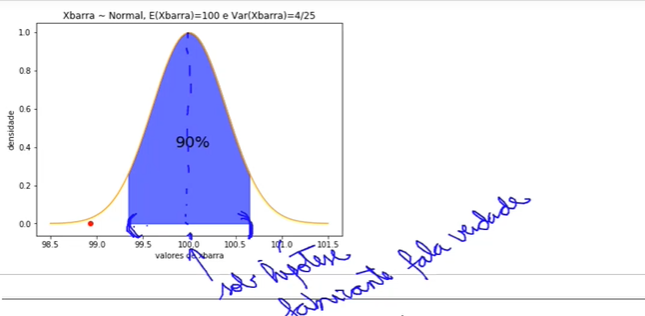

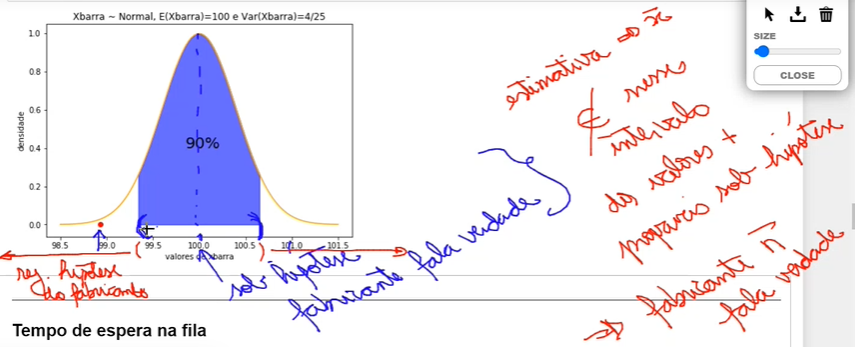

___

<div id="tempofila"></div>

## Tempo de espera na fila

(Baseado no Exercício 7-12 Montgomery). 

O tempo que um consumidor esperando na fila de *check-in* de um aeroporto é uma variável aleatória com média de $\mu$ minutos e desvio padrão de $3.5$ minuto.
Suponha que uma amostra aleatória de $49$ consumidores seja observada.

Responda: (<a href="#respostas2">Respostas</a>)

a) Seja $\overline{X}$ o tempo médio de espera na fila de *check-in* considerando uma amostra de 49 consumidores selecionados aleatoriamente. Qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)? Aqui foi feito uso do TLC? Justifique porquê.

In [ ]:
# ESCREVA SUA RESPOSTA AQUI

b) Assuma que $\mu=8.2$ minutos. Encontre a probabilidade de que o tempo médio de espera na fila seja:
  * Menor do que 10 minutos
  * Entre 8 e 10 minutos
  * Maior do que 9 minutos

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

c) Assuma que $\mu=8.2$ minutos. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=49$, que contemplam $95\%$ das possíveis médias amostrais mais próximas de $\mu$.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

d) Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=8.2$ minutos, $n=49$ e coeficiente de confiança igual a $95\%$.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

e) Considerando agora que $\mu$ é desconhecido, obtenha a margem de erro quando $n=49$ e coeficiente de confiança igual a $95\%$.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

f) Qual deveria ser o tamanho da amostra, para ter margem de erro de $0.5$ minutos e coeficiente de confiança igual a $95\%$.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

<div id="respostas"></div>

---
# Respostas

<a href="#indice">Voltar para o índice</a>

<div id="respostas1"></div>

### Respostas do exercício - Tomando decisões com TLC

**item a)** Normal(100, 0.16)

**item b)** São gráficos semelhantes a esses:

![](./fig_exerc1_itemb.png)


**item c)** A região de 90% das possíveis médias amostrais mais próximas de mu=100 vai de: 
99.3421 até 100.658

**item d)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 90% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.657941
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.657941


**item e)** Como xbarra=98.929451 está aquém da menor média, então não confio, com 90% de confiança.


<a href="#tomando-decisoes">Voltar para enunciado</a>



<div id="respostas2"></div>

### Respostas do exercício - Tempo de espera na fila do *check-in*

**item a)** 
$\overline{X}$ ~ Normal($\mu$, 12.25/49) ou, equivalente, $\overline{X}$ ~ Normal($\mu$, 0.25)

**item b)** 
* P($\overline{X}$ < 10) = 0.99984
* P(8 < $\overline{X}$ < 10) = 0.65526
* P($\overline{X}$ > 9) = 0.054799


**item c)** A região de 95% das possíveis médias amostrais mais próximas de $\mu$=8.2 vai de: 
7.22002 até 9.17998


**item d)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 95% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.979982
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.979982


**item e)** A margem de erro mantendo $n=49$ e 95% de confiança é 0.979982


**item f)** Tamanho da amostra para margem de erro de 0.5 minuto mantendo 95% de confiança é 188.

<a href="#tempoespera">Voltar para enunciado</a>

___

